<a href="https://colab.research.google.com/github/MohdIstiaqHossainJunaid/Bangla-Food-Review-Sentimental-Analysis-using-Machine-Learning/blob/main/(Glove)CSE498R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A Sentiment Analysis Model of Food Reviews in Bengali Texts Based on Deep Learning techniques.**

Supervisor- **Afn1**



**Members:**

1.   Mohd. Istiaq Hossain Junaid,1821577642
2.   Faisal Hossain
3.   Udayan shah Upal
4.   Anjana tameem(Unofficial)





#**Preprocessing**


**Step 01 - Punctuation Removal**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random



import keras
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns




import string 
import cufflinks as cf
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(1)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
import pandas as pd
import io
df = pd.read_csv("/content/drive/MyDrive/Playing with Data/Food Review - Food Review.csv")
df.head()

,Speech,Label
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1
4,আমি খাইসি খুবই মজার,1


In [ ]:
df['Label'].value_counts()

1    520
0    520
Name: Label, dtype: int64

In [ ]:
df.duplicated().sum()

0

# Data Pre-Processing



*   Punctuation Removal
*   Tokenization
*   Stopword Removal
*   Stemming
*   Join




In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(txt):
    punctuation_list = str(string.punctuation) + "।"
    txt_nopunct = "".join([c for c in txt if c not in punctuation_list])
    return txt_nopunct

In [ ]:
a = "দেশের রাজনীতি দিনকে দিন৫৪৪৫৬৪ পচে যাচ্ছে।78 frg पैरेनकाइमाজখজখজক  कोशिकाएं . what a shame. সুস্থ থাকা দায় ।👋≧◉ᴥ◉≦"

a = "".join(i for i in a if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
a=" ".join(a.split())
print(a)

দেশের রাজনীতি দিনকে দিন৫৪৪৫৬৪ পচে যাচ্ছে। জখজখজক সুস্থ থাকা দায় ।


In [ ]:
def remove_garbage(a):
  a= "".join(i for i in a if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  removed=" ".join(a.split())
  return removed


In [ ]:
df['Removed Puncutation'] = df['Speech'].apply(lambda x:remove_punctuation(x))
df.head()

,Speech,Label,Removed Puncutation
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার


In [ ]:
df['remove Eng'] = df['Removed Puncutation'].apply(lambda x:remove_garbage(x))
df

,Speech,Label,Removed Puncutation,remove Eng
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার
...,...,...,...,...
1035,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,1,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে
1036,সবসময়ই অসাধারণ রান্না ভাই।😍😍🥰,1,সবসময়ই অসাধারণ রান্না ভাই😍😍🥰,সবসময়ই অসাধারণ রান্না ভাই
1037,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,1,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ্ছে এ...
1038,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,1,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,অসম্ভব সুন্দর বিরানি রেসিপি


**2.Bangla Tokenization and Bangla Stopword Removing**




In [ ]:
pip install bnlp_toolkit

     |████████████████████████████████| 1.2 MB 3.6 MB/s 
     |████████████████████████████████| 23.9 MB 2.0 MB/s 
     |████████████████████████████████| 743 kB 25.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

df['Removed Stopped word'] = df['remove Eng'].apply(lambda x: remove_stopwords(x,stopwords))
df 

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ..."
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]"
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক..."
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]"
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]"
...,...,...,...,...,...
1035,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,1,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে,"[দেখেই, খেয়ে, ফেলতে, ইচ্ছা]"
1036,সবসময়ই অসাধারণ রান্না ভাই।😍😍🥰,1,সবসময়ই অসাধারণ রান্না ভাই😍😍🥰,সবসময়ই অসাধারণ রান্না ভাই,"[সবসময়ই, অসাধারণ, রান্না, ভাই]"
1037,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,1,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ্ছে এ...,"[চিকেন, বিরিয়ানিটা, মজা, একটু, খেয়ে, দেখি]"
1038,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,1,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,অসম্ভব সুন্দর বিরানি রেসিপি,"[অসম্ভব, সুন্দর, বিরানি, রেসিপি]"


**3. Stemming**

In [ ]:
pip install bangla-stemmer

In [ ]:
from bangla_stemmer.stemmer import stemmer
wordlist = ['কবিরগুলিকে', 'আমাকে', 'নামাবার']
stmr = stemmer.BanglaStemmer()
stm = stmr.stem(wordlist)
print(stm)

applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
['কবির', 'আমা', 'নামা']


In [ ]:
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()

In [ ]:
df['stemmed'] = df['Removed Stopped word'].apply(lambda x:stmr.stem(x))

In [ ]:
df.head()

,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word,stemmed
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ...","[ব্যাস্ততম, জীবন, একটু, মনরম, পরিবেশ, সময়, কাট..."
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]","[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]"
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক...","[খাবারের, মান, খারাপ, দাম, তুলনায়, পরিমান, কম,..."
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]","[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]"
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]","[খাইসি, খুব, মজ]"


**4.Join**

In [ ]:
df['sentence']=df['stemmed'].apply(' '.join)
df.head()

,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word,stemmed,sentence
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ...","[ব্যাস্ততম, জীবন, একটু, মনরম, পরিবেশ, সময়, কাট...",ব্যাস্ততম জীবন একটু মনরম পরিবেশ সময় কাটানোর ঘু...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]","[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]",অসাধারণ পরিবেশ সুন্দর মার্জিত আন্তরিক
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক...","[খাবারের, মান, খারাপ, দাম, তুলনায়, পরিমান, কম,...",খাবারের মান খারাপ দাম তুলনায় পরিমান কম ইফত প্ল...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]","[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]",ভালো বহুত খেয়েছি বাসা একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]","[খাইসি, খুব, মজ]",খাইসি খুব মজ


In [ ]:
from bnlp import BengaliGlove

bng = BengaliGlove()
glove_path = "/content/drive/MyDrive/Playing with Data/bn_glove.39M.300d.txt"
#word = "গ্রাম"
#res = bng.closest_word(glove_path, word)
#print(res)
#vec = bng.word2vec(glove_path, word)
#print(vec)

In [ ]:
reviews = df['sentence']


In [ ]:
reviews_list = []
for i in range(len(reviews)):
    reviews_list.append(reviews[i])

In [ ]:
sentiment = df['Label']
y = np.array(list(map(lambda x: 1 if x == 1 else 0, sentiment)))


xtrain, xtest, ytrain, ytest = train_test_split(df['sentence'],y, shuffle=True, test_size=0.2,stratify= y)
# find the length of the largest sentence in training data
max_len = xtrain.apply(lambda x: len(x)).max()
print(f'Max number of words in a text in training data: {max_len}')

Max number of words in a text in training data: 363


In [ ]:
#for data analysis and modeling
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#for text cleaning
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#for visualization
import matplotlib.pyplot as plt


In [ ]:
max_words = 10000
tokenizer = text.Tokenizer(num_words = max_words)
# create the vocabulary by fitting on x_train text
tokenizer.fit_on_texts(xtrain)
# generate the sequence of tokens
xtrain_seq = tokenizer.texts_to_sequences(xtrain)
xtest_seq = tokenizer.texts_to_sequences(xtest)

# pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len)
word_index = tokenizer.word_index

print('text example:', xtrain[0])
print('sequence of indices(before padding):', xtrain_seq[2])
print('sequence of indices(after padding):', xtrain_pad[2])

text example: ব্যাস্ততম জীবন একটু মনরম পরিবেশ সময় কাটানোর ঘুরে মন খারাপ ভাল লাগা এক জায়গা
sequence of indices(before padding): [441, 60, 741, 7, 3, 99, 49]
sequence of indices(after padding): [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 

In [ ]:
%%time
embedding_vectors = {}
# with open('/kaggle/input/glove6b100d/glove.6B.100d.txt','r',encoding='utf-8') as file:
with open('/content/drive/MyDrive/Playing with Data/bn_glove.39M.300d.txt','r',encoding='utf-8') as file:
    for row in file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors[word] = weights
print(f"Size of vocabulary in GloVe: {len(embedding_vectors)}")   

Size of vocabulary in GloVe: 178153
CPU times: user 26.2 s, sys: 1.11 s, total: 27.3 s
Wall time: 36.6 s


In [ ]:
#initialize the embedding_matrix with zeros
emb_dim = 300
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)+1
embedding_matrix = np.zeros((vocab_len, emb_dim))
oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            oov_count += 1 
            oov_words.append(word)
#print some of the out of vocabulary words
print(f'Some out of valubulary words: {oov_words[0:5]}')

Some out of valubulary words: ['খাবা', 'দিছ', 'মজ', 'মোটামু', 'দিয়']


In [ ]:
print(f'{oov_count} out of {vocab_len} words were OOV.')

599 out of 10000 words were OOV.


**LSTM**

In [ ]:

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation = 'sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam (learning_rate = 0.0001), metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         3000000   
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,219,777
Trainable params: 219,777
Non-trainable params: 3,000,000
_________________________________________________________________
None


In [ ]:
%%time
batch_size = 64
epochs  = 50
history = lstm_model.fit(xtrain_pad, np.asarray(ytrain), validation_data=(xtest_pad, np.asarray(ytest)), batch_size = batch_size, epochs = epochs)


Epoch 1/50
13/13 [==============================] - 10s 214ms/step - loss: 0.6837 - accuracy: 0.5481 - val_loss: 0.6719 - val_accuracy: 0.6154
Epoch 2/50
13/13 [==============================] - 1s 97ms/step - loss: 0.6710 - accuracy: 0.5962 - val_loss: 0.6583 - val_accuracy: 0.6923
Epoch 3/50
13/13 [==============================] - 1s 92ms/step - loss: 0.6528 - accuracy: 0.6526 - val_loss: 0.6448 - val_accuracy: 0.7067
Epoch 4/50
13/13 [==============================] - 1s 92ms/step - loss: 0.6368 - accuracy: 0.7127 - val_loss: 0.6311 - val_accuracy: 0.6971
Epoch 5/50
13/13 [==============================] - 1s 88ms/step - loss: 0.6186 - accuracy: 0.7067 - val_loss: 0.6168 - val_accuracy: 0.7212
Epoch 6/50
13/13 [==============================] - 1s 86ms/step - loss: 0.6012 - accuracy: 0.7476 - val_loss: 0.6013 - val_accuracy: 0.7308
Epoch 7/50
13/13 [==============================] - 1s 85ms/step - loss: 0.5805 - accuracy: 0.7632 - val_loss: 0.5835 - val_accuracy: 0.7548
Epoch 8/50


Text(0.5, 1.0, 'Accuracy')

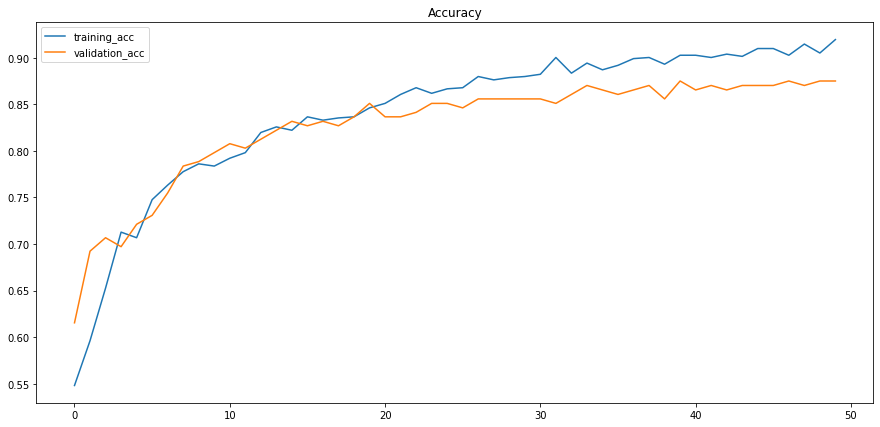

In [ ]:
#plot accuracy
plt.figure(figsize=(15, 7))
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

In [ ]:
train_lstm_results = lstm_model.evaluate(xtrain_pad, np.asarray(ytrain), verbose=0, batch_size=256)
test_lstm_results = lstm_model.evaluate(xtest_pad, np.asarray(ytest), verbose=0, batch_size=256)
print(f'Train accuracy: {train_lstm_results[1]*100:0.2f}')
print(f'Test accuracy: {test_lstm_results[1]*100:0.2f}')

Train accuracy: 91.95
Test accuracy: 87.50


**GRU**

In [ ]:
emb_dim = embedding_matrix.shape[1]
gru_model = Sequential()
gru_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation = 'sigmoid'))
gru_model.compile(loss='binary_crossentropy',optimizer=tf.optimizers.Adam (learning_rate = 0.0001), metrics=['accuracy'])
print(gru_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         3000000   
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,165,249
Trainable params: 165,249
Non-trainable params: 3,000,000
_________________________________________________________________
None


In [ ]:

batch_size = 64
epochs  = 50
history = gru_model.fit(xtrain_pad, np.asarray(ytrain), validation_data=(xtest_pad, np.asarray(ytest)), batch_size = batch_size, epochs = epochs)


Epoch 1/50
13/13 [==============================] - 3s 122ms/step - loss: 0.6842 - accuracy: 0.5589 - val_loss: 0.6784 - val_accuracy: 0.5913
Epoch 2/50
13/13 [==============================] - 1s 79ms/step - loss: 0.6755 - accuracy: 0.5901 - val_loss: 0.6629 - val_accuracy: 0.6106
Epoch 3/50
13/13 [==============================] - 1s 80ms/step - loss: 0.6592 - accuracy: 0.6118 - val_loss: 0.6492 - val_accuracy: 0.6538
Epoch 4/50
13/13 [==============================] - 1s 79ms/step - loss: 0.6486 - accuracy: 0.6382 - val_loss: 0.6365 - val_accuracy: 0.6683
Epoch 5/50
13/13 [==============================] - 1s 79ms/step - loss: 0.6330 - accuracy: 0.6791 - val_loss: 0.6241 - val_accuracy: 0.6731
Epoch 6/50
13/13 [==============================] - 1s 80ms/step - loss: 0.6181 - accuracy: 0.7115 - val_loss: 0.6130 - val_accuracy: 0.6779
Epoch 7/50
13/13 [==============================] - 1s 79ms/step - loss: 0.6106 - accuracy: 0.7055 - val_loss: 0.6016 - val_accuracy: 0.6731
Epoch 8/50
1

Text(0.5, 1.0, 'Accuracy')

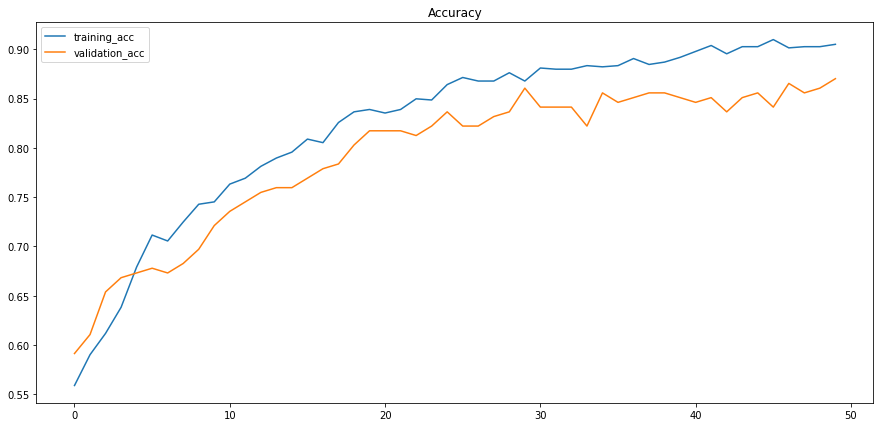

In [ ]:
#plot accuracy
plt.figure(figsize=(15, 7))
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

In [ ]:
train_gru_results = gru_model.evaluate(xtrain_pad, np.asarray(ytrain), verbose=0, batch_size=256)
test_gru_results = gru_model.evaluate(xtest_pad, np.asarray(ytest), verbose=0, batch_size=256)
print(f'Train accuracy: {train_gru_results[1]*100:0.2f}')
print(f'Test accuracy: {test_gru_results[1]*100:0.2f}')

Train accuracy: 90.26
Test accuracy: 87.02


**RRN**

In [ ]:
from tensorflow.python.keras.layers.recurrent import SimpleRNN
emb_dim = embedding_matrix.shape[1]
RRN_model = Sequential()
RRN_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
RRN_model.add(SimpleRNN(128, return_sequences=False))
RRN_model.add(Dropout(0.5))
RRN_model.add(Dense(1, activation = 'sigmoid'))
RRN_model.compile(loss='binary_crossentropy',optimizer=tf.optimizers.Adam (learning_rate = 0.0001), metrics=['accuracy'])
print(RRN_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 300)         3000000   
                                                                 
 module_wrapper (ModuleWrapp  (None, 128)              54912     
 er)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,055,041
Trainable params: 55,041
Non-trainable params: 3,000,000
_________________________________________________________________
None


In [ ]:
batch_size = 64
epochs  = 50
history = RRN_model.fit(xtrain_pad, np.asarray(ytrain), validation_data=(xtest_pad, np.asarray(ytest)), batch_size = batch_size, epochs = epochs)

Epoch 1/50
13/13 [==============================] - 6s 391ms/step - loss: 0.7698 - accuracy: 0.4940 - val_loss: 0.7249 - val_accuracy: 0.5385
Epoch 2/50
13/13 [==============================] - 5s 366ms/step - loss: 0.7431 - accuracy: 0.5312 - val_loss: 0.7092 - val_accuracy: 0.5865
Epoch 3/50
13/13 [==============================] - 5s 359ms/step - loss: 0.7155 - accuracy: 0.5745 - val_loss: 0.6961 - val_accuracy: 0.5865
Epoch 4/50
13/13 [==============================] - 5s 365ms/step - loss: 0.6918 - accuracy: 0.6010 - val_loss: 0.6848 - val_accuracy: 0.5913
Epoch 5/50
13/13 [==============================] - 6s 453ms/step - loss: 0.6585 - accuracy: 0.6214 - val_loss: 0.6740 - val_accuracy: 0.6058
Epoch 6/50
13/13 [==============================] - 5s 350ms/step - loss: 0.6511 - accuracy: 0.6358 - val_loss: 0.6639 - val_accuracy: 0.6058
Epoch 7/50
13/13 [==============================] - 4s 338ms/step - loss: 0.6338 - accuracy: 0.6490 - val_loss: 0.6551 - val_accuracy: 0.6202
Epoch 

Text(0.5, 1.0, 'Accuracy')

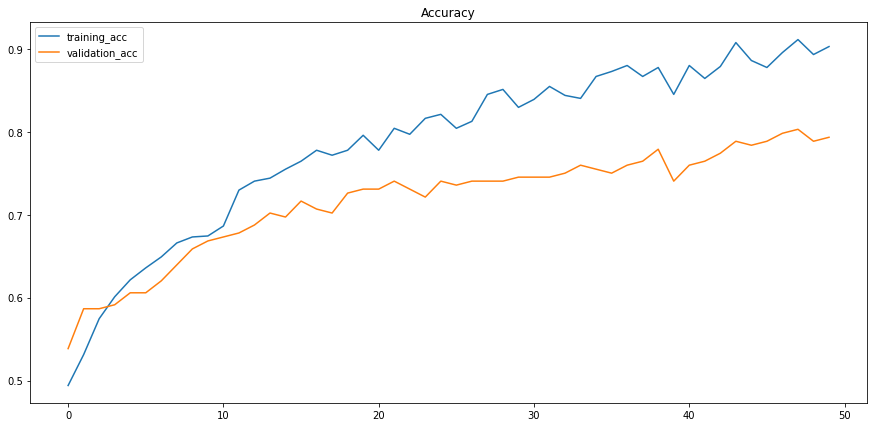

In [ ]:
#plot accuracy
plt.figure(figsize=(15, 7))
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

In [ ]:
train_gru_results = RRN_model.evaluate(xtrain_pad, np.asarray(ytrain), verbose=0, batch_size=256)
test_gru_results = RRN_model.evaluate(xtest_pad, np.asarray(ytest), verbose=0, batch_size=256)
print(f'Train accuracy: {train_gru_results[1]*100:0.2f}')
print(f'Test accuracy: {test_gru_results[1]*100:0.2f}')

Train accuracy: 92.91
Test accuracy: 79.33


**ROC Curves**

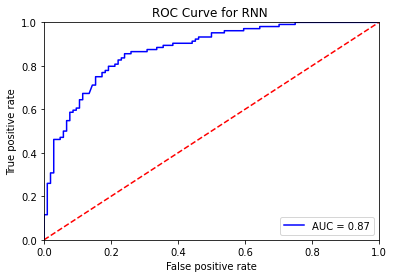

In [ ]:
    predictions = RRN_model.predict(xtest_pad).ravel()
    fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(ytest, predictions)
    auc_keras = metrics.auc(fpr_keras, tpr_keras)
    
    plt.figure(1)
    plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve for RNN ')
    plt.show()

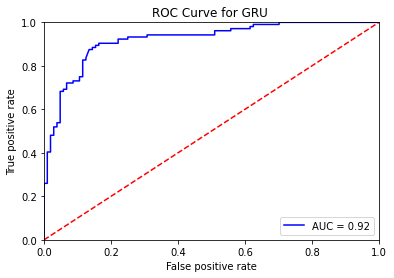

In [ ]:
    predictions = gru_model.predict(xtest_pad).ravel()
    fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(ytest, predictions)
    auc_keras = metrics.auc(fpr_keras, tpr_keras)
    
    plt.figure(1)
    plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve for GRU ')
    plt.show()

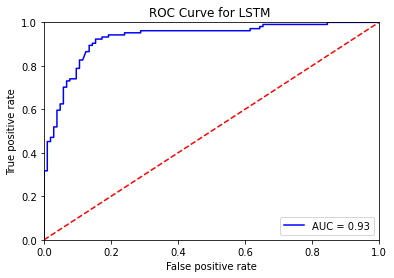

In [ ]:
  predictions = lstm_model.predict(xtest_pad).ravel()
  fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(ytest, predictions)
  auc_keras = metrics.auc(fpr_keras, tpr_keras)
  
  plt.figure(1)
  plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1], 'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC Curve for LSTM ')
  plt.show()